In [1]:
# Names

# Final Project: 2016 Voter Survey Data

In this data set we will be examining survey data from the 2016 presidential election to correlations between voter concerns and voter behaviors. We will be examining how priorities of voters inform who they will voter for during an election.

In [25]:
import warnings
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


In [3]:
# importing data

In [56]:
data = pd.read_csv("voter_survey_2016_data.csv", engine='python')
data.head(10)




,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94952,Yes,Yes,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,29nov2016 22:59:43,29nov2016 23:28:24
1,2108,0.562867,Republican Party,In the Republican primary,NaN,Donald Trump,Arizona,85298,Yes,Yes,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,29nov2016 15:41:28,29nov2016 18:58:28
2,2597,0.552138,Republican Party,In the Democratic primary,Hillary Clinton,NaN,Wisconsin,54904,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 16:08:39,29nov2016 16:32:43
3,4148,0.207591,Democratic Party,In the Democratic primary,Someone else,NaN,Oklahoma,74104,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14dec2016 18:46:33,14dec2016 19:11:20
4,4460,0.333729,Republican Party,In the Republican primary,NaN,Marco Rubio,Texas,78253,Yes,Yes,...,NaN,NaN,Paul Sadler,Democratic,Ted Cruz,Republican,NaN,NaN,01dec2016 10:17:47,01dec2016 10:59:48
5,5225,0.207186,Democratic Party,In the Democratic primary,Hillary Clinton,NaN,California,94954,Yes,Yes,...,NaN,NaN,Dianne Feinstein,Democratic,Elizabeth Emken,Republican,NaN,NaN,29nov2016 15:30:37,29nov2016 15:50:15
6,5903,0.455791,Republican Party,In the Democratic primary,Bernie Sanders,NaN,Kentucky,40601,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30nov2016 05:50:01,30nov2016 08:46:00
7,6059,1.054491,Republican Party,In the Republican primary,NaN,Donald Trump,Wisconsin,53142,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 18:58:36,29nov2016 19:35:57
8,8048,0.478014,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94707,Yes,Yes,...,Marilyn Singleton,Independent,Dianne Feinstein,Democratic,Elizabeth Emken,Republican,NaN,NaN,21dec2016 13:20:32,21dec2016 13:36:12
9,9869,0.416900,Democratic Party,In the Democratic primary,Bernie Sanders,NaN,Vermont,5733,Yes,Yes,...,NaN,NaN,Bernie Sanders,Independent,John MacGovern,Republican,NaN,NaN,29nov2016 22:27:57,29nov2016 22:42:00


## Bar Graph Representations
Below we can visually analyze this data through bar graphs. We have sorted the responses by label (presidential candidate voted for) and response to the first few questions of the survey where issues were ranked on the categorical scale: 'Very important', 'Somewhat important', 'Not very important', 'Unimportant'.

Issues that are split across party lines can be seen visually via large gaps in the blue bar (Democrat voters) and red bars (Republican voters) in importance and whether the blue and red bars increase or decrease in size when moving along the x axis. For instance, social issues such as Gender Equality, Racial Equality, and Gay Rights have a large blue bar in the Very Important category, while the red bars are larger in the Not Very Important or Unimportant categories. Meanwhile issues of national security such as terrorism, immigration, and size of government have large red bars in the Very Important category while the blue bars are more evenly spaced out. 

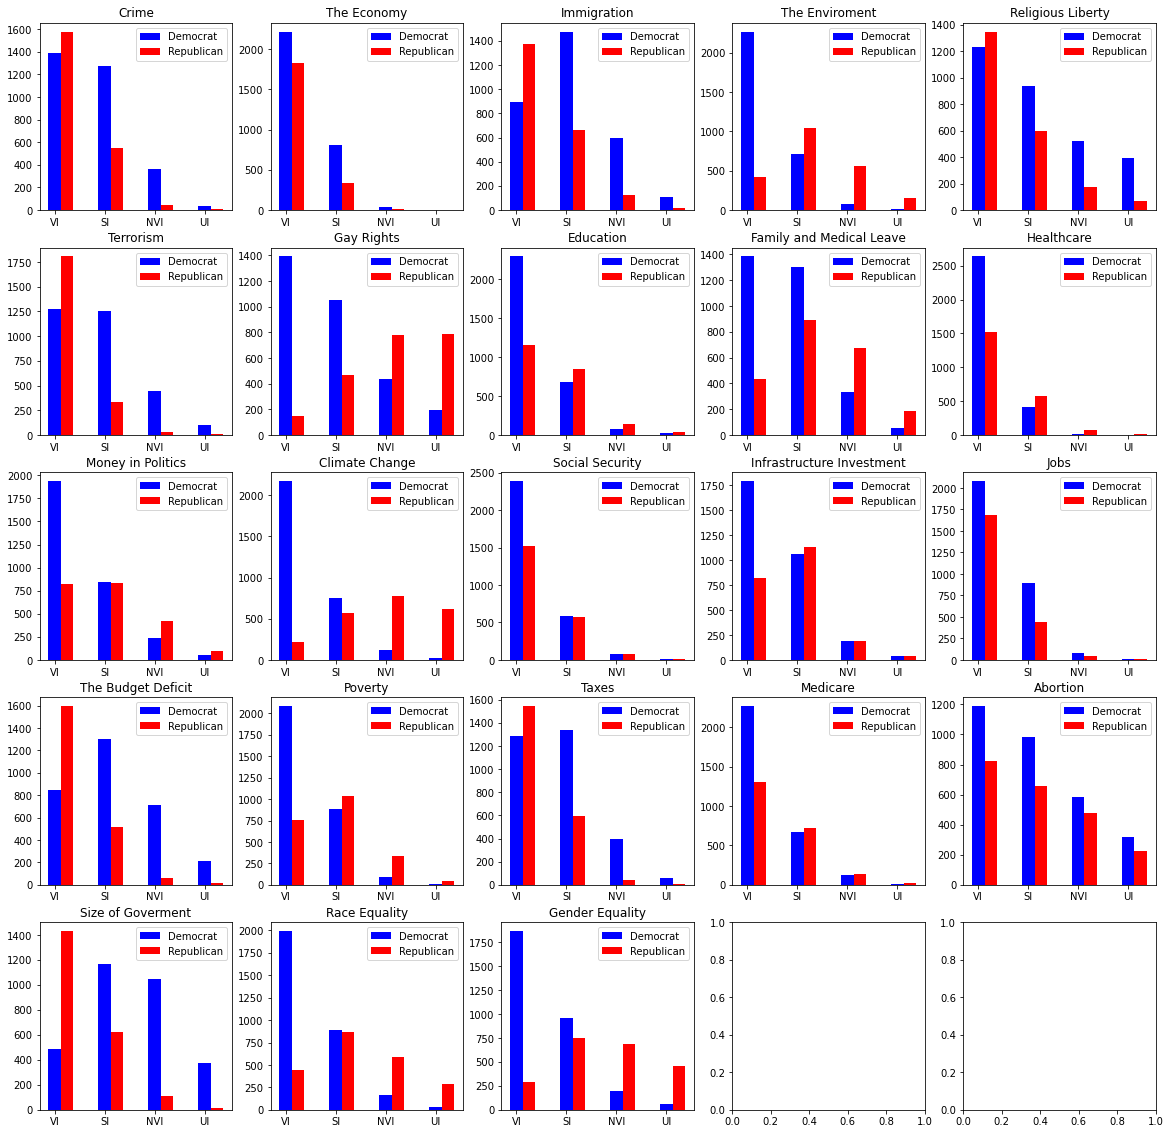

In [54]:
def dataRelabeled(data):
    
    columns = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    #df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #this fills with mode of column
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    #print(len(columns))
    #print(df.shape)
    #df_clean.columns = columns
    #print(df_clean.head())
    df.columns = columns
    #data_x = pd.get_dummies(df)
    label = transformLabels(labels)
    #print(df.head())
    return label, df

def sortCounts(counts):
    ret = [counts['Very important'], counts['Somewhat important'], counts['Not very important'], counts['Unimportant']]
    return ret

label, df_explore = dataRelabeled(data)
columns_issues = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality']
df_explore['label'] = label
df_explore.head()

df_dem = df_explore.loc[df_explore['label']==1]
df_rep = df_explore.loc[df_explore['label'] == 2]

i = 1


plt.subplots(5, 5, figsize=(20, 20))

for c in columns_issues:
    #group survey responses
    counts_dem = df_dem.groupby([c]).size()
    counts_rep = df_rep.groupby([c]).size()
 
    #sort counts in decreasing order of importance
    counts_dem = sortCounts(counts_dem)
    counts_rep = sortCounts(counts_rep)

    # build subplots
    num_cats = df2[c].nunique()
    X = np.arange(num_cats)
    plt.subplot(5, 5, i)
    plt.bar(X + 0.00, counts_dem, color = 'b', width = 0.25)
    plt.bar(X + 0.25, counts_rep, color = 'r', width = 0.25)
    categories = ['VI', 'SI', 'NVI', 'UI']
    plt.xticks(X.tolist(), labels=categories)
    plt.title(c)
    plt.legend(labels=['Democrat','Republican'])
    i += 1
plt.show()

## Chi Square Test
To further demonstrate that there is a correlation between public issues and presidential candidate voted for, we can due a chi square test. The Chi Square Test for Independence measures whether two categories are independent or not. It starts with the null hypothesis "The two categories are independent". If, however, the p-value (a statistical measurement of the test), is less than a critical value of 0.05, we can reject the null hypothesis with a 95% confidence. Instead we accept the alternative hypothesis "The two categories are dependent". We can run this test on each public issue where we compare presidential candidate with survey response. If we reject the null hypothesis, that the two categories are independent, then that means there is a correlation between the two categories making this data fit for data mining models.

In [53]:
# track results of chi square tests
num_rejected = 0
num_approved = 0
crit_val = 0.05

df_explore_nolabel = df_explore.drop(['label'], axis=1)
cols = df_explore.columns

for c in cols:
    contingency = pd.crosstab(df_explore[c], df_explore['label'])
    c, p, dof, expected = sp.stats.chi2_contingency(contingency)
    if(p <= 0.05):
        num_rejected += 1
    else:
        num_approved += 1
data_chi = {'Null Hypothesis': ['REJECTED', 'ACCEPTED'],
            'Number of Survey Questions': [num_rejected, num_approved]}
df_chi = pd.DataFrame(data_chi)
df_chi

,Null Hypothesis,Number of Survey Questions
0,REJECTED,47
1,ACCEPTED,0


Note how after running the Chi Square Test between every survey questions answers and the presidential candidate category, the null hypothesis is rejected. Therefore, it is likely for each survey question that there is some correlation between survey answers and presidential candidate voted for. We can now proceed with confidence that this data can be used for machine learning models where survey answers can be used to predict presidential candidate voted for.

# Feature Selection
We want to examine which issues matter to which party's voters. To examine this we will be looking at columns
imiss_a_2016 - imiss_y_2016. These columns represent the surveyer's answers to questions where they were asked to rank how important a public issue was on a categorical scale: "Very important", "Somewhat important, "Not very important", "unimportant". We will be focus our data set on these columns so that our machine learning algorithm focuses purely on voter interest since that is what we're interested in investigating. We will also be including the column of who the surveyer voted for president as this will form the basis of our labels (presvote16post_2016). 

In [58]:
def features(data, chosen_features):
    columns_renamed = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    return dataPrep(data, chosen_features, columns_renamed)
    

# Data Cleaning

We want to turn the data into something that we can easily use to train our models. We change our labels to: Hillary Clinton to 1, Donald Trump to 2, and all others are 0. We also transform the 23 question survey using One Hot Encoding because all of the responces are catigorical. We have also added results of questions about issues to the data set. The
overall size of the dataset is about 8000 x 46, which will expand to 8000 x 173 with one hot encoding.


In [59]:

def dataPrep(data, columns, columns_renamed):
    
    df = pd.DataFrame(data=data, columns=columns)
    
    df.dropna(axis=0, inplace=True) #This drops all nans 
    labels = df['presvote16post_2016']
    df = df.drop(['presvote16post_2016'], axis=1)
    #df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #this fills with mode of column
    columns = ['Crime', 'The Economy', 'Immigration', 'The Enviroment', 'Religious Liberty', 'Terrorism', 'Gay Rights', 'Education', 'Family and Medical Leave', 'Healthcare', 'Money in Politics', 'Climate Change', 'Social Security', 'Infrastructure Investment', 'Jobs', 'The Budget Deficit', 'Poverty', 'Taxes', 'Medicare', 'Abortion', 'Size of Goverment', 'Race Equality', 'Gender Equality', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
    df.columns = columns
    data_x = pd.get_dummies(df)
    label = transformLabels(labels)
    return label, data_x

def transformLabels(temp):
    label = []
    for name in temp:
        if name == "Hillary Clinton":
            label.append(1)
        elif name == "Donald Trump":
            label.append(2)
        elif name == "Gary Johnson":
            label.append(3)
        elif name == "Jill Stein":
            label.append(4)
        elif name == "Evan McMullin":
            label.append(5)
        else:
            label.append(0)
    return label

chosen_features = ['presvote16post_2016', 'imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016','imiss_p_2016', 'imiss_q_2016','imiss_r_2016','imiss_s_2016', 'imiss_t_2016','imiss_u_2016','imiss_x_2016','imiss_y_2016', 'immi_contribution_2016', 'immi_naturalize_2016', 'immi_makedifficult_2016', 'immi_muslim_2016', 'abortview3_2016', 'gaymar_2016', 'view_transgender_2016', 'deathpen_2016', 'deathpenfreq_2016', 'police_threat_2016', 'univhealthcov_2016', 'healthreformbill_2016', 'envwarm_2016', 'envpoll2_2016', 'affirmact_gen_2016', 'taxdoug_2016', 'govt_reg_2016', 'gvmt_involment_2016', 'tradepolicy_2016', 'free_trade_1_2016', 'free_trade_2_2016', 'free_trade_3_2016', 'free_trade_4_2016']
label, data_x = features(data, chosen_features)
    




# Tree Model

In [60]:

params = {"max_depth": list(range(10, 40, 5)), "min_samples_leaf": [5,10,15,20], "max_features": list(range(20, 160, 20))}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, params, cv=5, scoring='accuracy')
grid_search.fit(data_x, label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)



Accuracy: 84.481862270829
time :  191.89511489868164


# Naive Bayes (NB) & Evaluation Metrics

In [61]:
clf = GaussianNB()
clf.fit(data_x, label)

nested_score = cross_val_score(clf, data_x, label, cv=10)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 20.76650582342351


# k-Nearest Neighbor (KNN)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=7)
pipe = Pipeline(steps=[("knn", knn)])

param_grid = {
    'knn__n_neighbors': list(range(1, 50))
}

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(data_x,label)
start = time.time()
nested_score = cross_val_score(grid_search, data_x, label, cv=10)
end = time.time()
print("Accuracy:", nested_score.mean()*100)
print("time : ", end - start)

Accuracy: 85.65407884584766
time :  255.76142692565918


# NN

In [39]:
from sklearn.neural_network import MLPClassifier


nn = MLPClassifier()
param_grid = {
    'nn__hidden_layer_sizes': list(range(30, 100, 10)),
    'nn__activation':['logical', 'tanh', 'relu']
}

pipe = Pipeline([("nn", nn)])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)
nested_score = cross_val_score(grid, data_x, label, cv=5)
print("Accuracy:", nested_score.mean()*100)

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "/Users/coleh

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.83659643 0.83746964 0.83816986 0.83554488 0.83991918
 0.84656728 0.84481765 0.81962355 0.81804906 0.82942172 0.82924521
 0.83012178 0.83274538 0.83361966]
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/s

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.8329287  0.8

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.84036398 0.8

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.84495558 0.84342672 0.83927371 0.8410233  0.83905418
 0.84233215 0.84626968 0.82615035 0.82965145 0.83402518 0.8320551
 0.83642812 0.83861606 0.83927467]
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multil

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.83489663 0.8

Accuracy: 84.21949660138637


/Users/coleharper/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Random Forests

In [41]:
# your code goes here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
param_grid = {
    'max_depth': list(range(30, 60, 5)),
    'min_samples_leaf':[8,10,12, 14, 16],
    'max_features':['sqrt','log2']
}

grid = GridSearchCV(forest, param_grid, cv=5, scoring ='accuracy')
grid.fit(data_x, label)
nested_score = cross_val_score(grid, data_x, label, cv=5)
print("Accuracy:", nested_score.mean()*100)


Accuracy: 86.1264522878696


# SVM

In [50]:

svm = SVC()
pipe = Pipeline(steps=[("svc", svm)])

param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(data_x,label)

nested_score = cross_val_score(grid, data_x, label, cv=5, scoring='accuracy')
print("Accuracy:", nested_score.mean()*100)

Accuracy: 86.35383208217856
